In [79]:
#Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from rdkit import Chem
from rdkit.Chem import Descriptors

# Step 1 : Data Preprocessing

## 1. Loading of Dataset
Loading the dataset and reading the first and last 5 records of the dataset just to gauge the structure of the dataset.
As part of exploring the dataset, I checked the length, shape, and the availability of null values in all the attributes

In [27]:
df = pd.read_csv("solubility.csv")#Processed Delaney dataset
df.head(5)

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [29]:
df.tail()

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
1123,halothane,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,1,72.151,0,0,1,0.00,-3.180,CCC(C)C
1127,Stirofos,1,365.964,0,1,5,44.76,-4.522,COP(=O)(OC)OC(=CCl)c1cc(Cl)c(Cl)cc1Cl


In [31]:
len(df) #Correlates with our excel file

1128

In [830]:
df.shape #1128 Rows and 9 Columns

(1128, 9)

In [33]:
num_of_duplicates = (df.duplicated() == True).sum() #Checking for duplicate records
num_of_unique_values = (df.duplicated() == False).sum() #Checking for unique records
print("Duplicate values :",num_of_duplicates) 
print("Unique values    :",num_of_unique_values)

Duplicate values : 0
Unique values    : 1128


In [35]:
df.info() #Checking for null values in every column in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Compound ID                                1128 non-null   object 
 1   Minimum Degree                             1128 non-null   int64  
 2   Molecular Weight                           1128 non-null   float64
 3   Number of H-Bond Donors                    1128 non-null   int64  
 4   Number of Rings                            1128 non-null   int64  
 5   Number of Rotatable Bonds                  1128 non-null   int64  
 6   Polar Surface Area                         1128 non-null   float64
 7   measured log solubility in mols per litre  1128 non-null   float64
 8   smiles                                     1128 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 79.4+ KB


## 2. Exploring the dataset
Checking the basic statistics for our dataset

In [37]:
df.describe() #Checking for basic statistics in our dataset

,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


Renaming columns to avoid spaces between two worded columns and I also shortened the long worded columns as well.

In [39]:
#Renaming columns to avoid spaces between two worded columns and shortening long worded columns
df = df.rename(columns={"Compound ID" : "Compound_ID", "Minimum Degree" : "Minimum_Degree", "Molecular Weight" : "Molecular_Weight", "Number of H-Bond Donors" : "Number_of_H_Bond_Donors", "Number of Rings" : "Number_of_Rings", "Number of Rotatable Bonds" : "Number_of_Rotatable_Bonds", "Polar Surface Area" : "Polar_Surface_Area", "measured log solubility in mols per litre" : "Log_Solubility", "smiles" : "Smiles"})
df.head(10)

,Compound_ID,Minimum_Degree,Molecular_Weight,Number_of_H_Bond_Donors,Number_of_Rings,Number_of_Rotatable_Bonds,Polar_Surface_Area,Log_Solubility,Smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.33,c1ccsc1
5,benzothiazole,2,135.191,0,2,0,12.89,-1.50,c2ccc1scnc1c2
6,"2,2,4,6,6'-PCB",1,326.437,0,2,1,0.00,-7.32,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl
7,Estradiol,1,272.388,2,4,0,40.46,-5.03,CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O
8,Dieldrin,1,380.913,0,5,0,12.53,-6.29,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl
9,Rotenone,1,394.423,0,5,3,63.22,-4.42,COc5cc4OCC3Oc2c1CC(Oc1ccc2C(=O)C3c4cc5OC)C(C)=C


Converting categorical column "Smiles" to numerical values using the RDkit library

In [45]:
smiles = df["Smiles"]
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles] #Converting Smiles to molecular objects
descriptors = [Descriptors.MolWt(mol) for mol in molecules] #Computing molecular discriptors using the molecular objects obtained from "molecules"
# print(len(descriptors))
# print(len(smiles))
# print(type(descriptors))
# print(type(smiles))
descriptors_conv = pd.Series(descriptors) #Converting our descriptors into a Series data type
print(descriptors_conv)
df["Smiles"] = descriptors_conv
X = df.drop(["Compound_ID","Log_Solubility"], axis=1)#Featuers
X.head(10)
# print(X["Smiles"].value_counts())
# X.shape
# print(X)

0       457.432
1       201.225
2       152.237
3       278.354
4        84.143
         ...   
1123    197.381
1124    219.266
1125    246.359
1126     72.151
1127    365.964
Length: 1128, dtype: float64


,Minimum_Degree,Molecular_Weight,Number_of_H_Bond_Donors,Number_of_Rings,Number_of_Rotatable_Bonds,Polar_Surface_Area,Smiles
0,1,457.432,7,3,7,202.32,457.432
1,1,201.225,1,2,2,42.24,201.225
2,1,152.237,0,0,4,17.07,152.237
3,2,278.354,0,5,0,0.00,278.354
4,2,84.143,0,1,0,0.00,84.143
5,2,135.191,0,2,0,12.89,135.191
6,1,326.437,0,2,1,0.00,326.437
7,1,272.388,2,4,0,40.46,272.388
8,1,380.913,0,5,0,12.53,380.913
9,1,394.423,0,5,3,63.22,394.423


In [47]:
y = df.loc[:,df.columns == "Log_Solubility"]#Targets
y.head(10)
# print(y)
y.describe()
# y.shape
# print(y)

,Log_Solubility
count,1128.000000
mean,-3.050102
std,2.096441
min,-11.600000
25%,-4.317500
50%,-2.860000
75%,-1.600000
max,1.580000


For curiosity, I wanted to see the common degree to which these compunds are soluable in, based on the insights below, we can deduce that most compounds are soluable in 1 degree

Minimum_Degree
1    1060
2      67
0       1
Name: count, dtype: int64


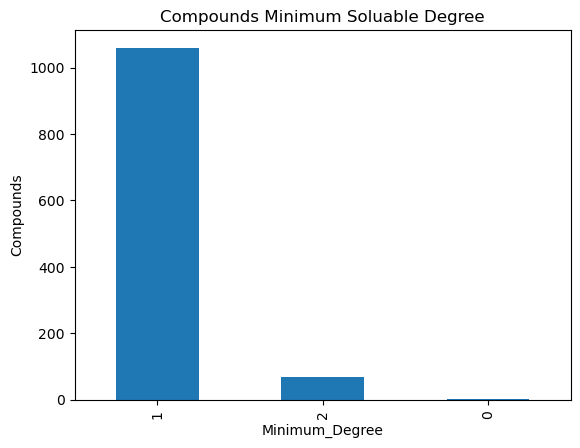

In [49]:
df["Minimum_Degree"].value_counts().plot(kind="bar",title="Compounds Minimum Soluable Degree",ylabel="Compounds")#Check commonrarity of the minimum degree of these compounds
print(df["Minimum_Degree"].value_counts())

By delving deeper into each attribute, we can see that most compounds do not have "H Bond Donors" in them, this implies that the H Bond Donor attribute won't be in the higher ranks in terms of feature importances.

Number_of_H_Bond_Donors
0     635
1     307
2     137
3      22
4      11
6       6
5       6
8       2
7       1
11      1
Name: count, dtype: int64


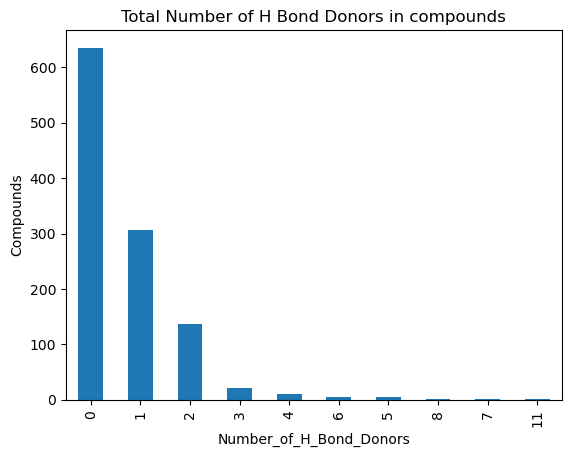

In [51]:
df["Number_of_H_Bond_Donors"].value_counts().plot(kind="bar",title="Total Number of H Bond Donors in compounds",ylabel="Compounds")
print(df["Number_of_H_Bond_Donors"].value_counts())

Most compounds do have rings as part of their molecular structure and therefore this attribute might have a greater importance in comparison to other features.

Number_of_Rings
1    386
0    317
2    221
3    116
4     63
5     16
6      4
7      3
8      2
Name: count, dtype: int64


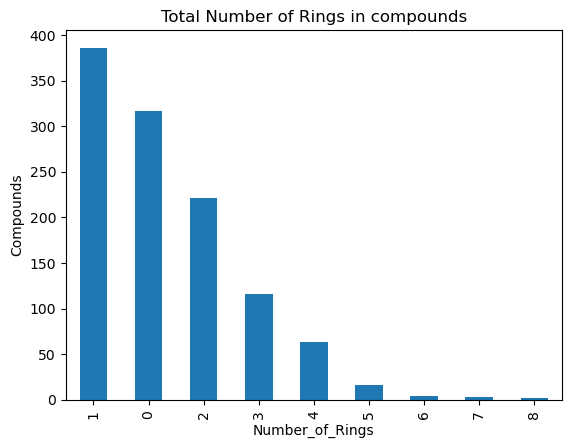

In [53]:
df["Number_of_Rings"].value_counts().plot(kind="bar",title="Total Number of Rings in compounds",ylabel="Compounds")#Checking the number of rings for these compounds
print(df["Number_of_Rings"].value_counts())

Based on the visuals below, we can see that there is a range in the number of rotatable bonds in compounds, meaning that this attribute has the potential to be in higher ranks regarding the feature importance.

Number_of_Rotatable_Bonds
0     361
1     232
2     174
3     102
4      86
5      57
6      40
8      24
7      22
9       9
10      6
12      4
14      3
16      2
13      2
11      1
15      1
23      1
17      1
Name: count, dtype: int64


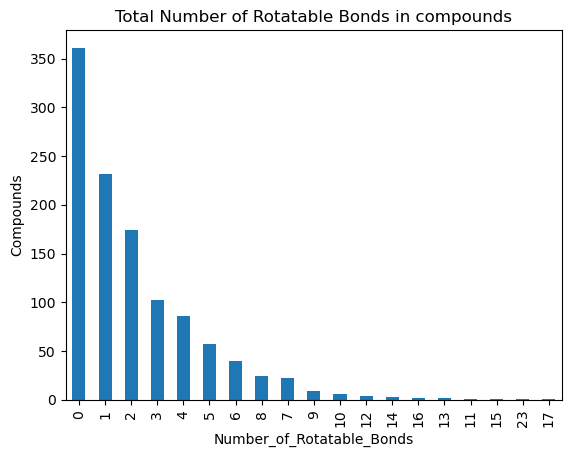

In [55]:
df["Number_of_Rotatable_Bonds"].value_counts().plot(kind="bar", title="Total Number of Rotatable Bonds in compounds",ylabel="Compounds")#Checking the Compounds With Rotatable Bonds
print(df["Number_of_Rotatable_Bonds"].value_counts())

The distribution in the "Minimum_Degree" as can be seen below is negatively skewed  and its indicating that most values have a minimum soluable degree within the range of 1-1.50

<Axes: title={'center': 'Distribution of Minimum Degree'}, xlabel='Degree', ylabel='Frequency'>

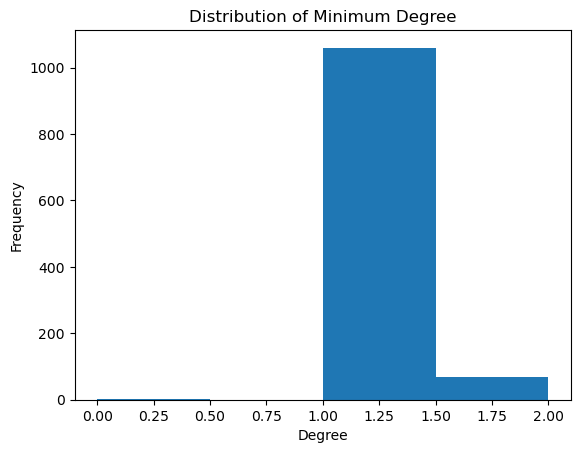

In [57]:
#Dsitribution of the features
df["Minimum_Degree"].plot(kind="hist",bins=4,title="Distribution of Minimum Degree",xlabel="Degree")

The histogram for most of these features have one thing in common, they are positively skewed of which this indicates that most of the datapoints are congested on the left side with very few outliers in some of the features. The histograms can be seen below for various features.

<Axes: title={'center': 'Distribution of H Bond Donors'}, xlabel='H Bond Donors', ylabel='Frequency'>

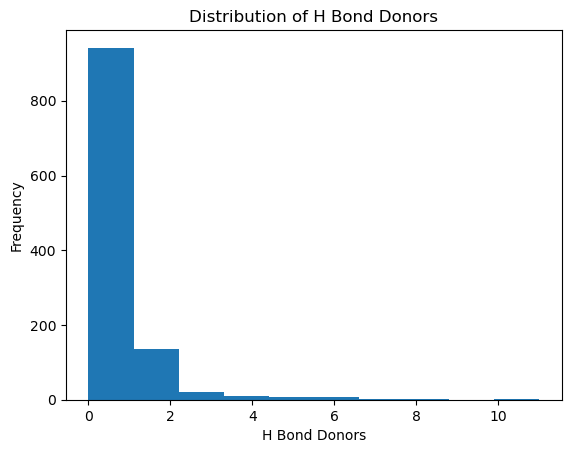

In [59]:
df["Number_of_H_Bond_Donors"].plot(kind="hist",bins=10,title="Distribution of H Bond Donors",xlabel="H Bond Donors")

<Axes: title={'center': 'Distribution of Rings in compounds'}, xlabel='Number of Rings', ylabel='Frequency'>

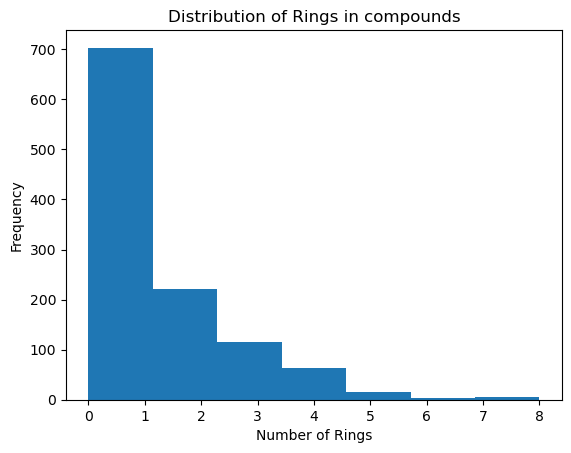

In [61]:
df["Number_of_Rings"].plot(kind="hist",bins=7,title="Distribution of Rings in compounds",xlabel="Number of Rings")

<Axes: title={'center': 'Distribution of Rotatable Bonds'}, xlabel='Rotatable Bonds', ylabel='Frequency'>

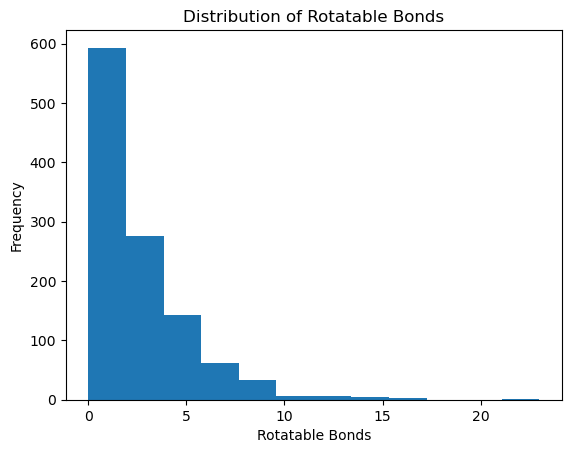

In [63]:
df["Number_of_Rotatable_Bonds"].plot(kind="hist",bins=12,title="Distribution of Rotatable Bonds",xlabel="Rotatable Bonds")

<Axes: title={'center': 'Distribution of Polar Surface Area'}, xlabel='Polar Surface Area', ylabel='Frequency'>

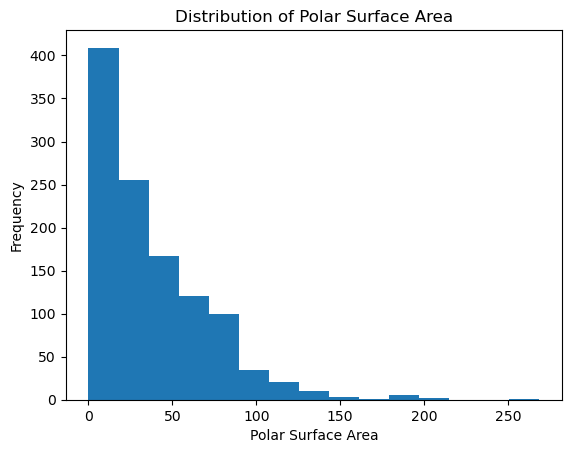

In [65]:
df["Polar_Surface_Area"].plot(kind="hist",bins=15,title="Distribution of Polar Surface Area",xlabel="Polar Surface Area")

<Axes: title={'center': 'Distribution of Molecular Weight'}, xlabel='Molecular Weight', ylabel='Frequency'>

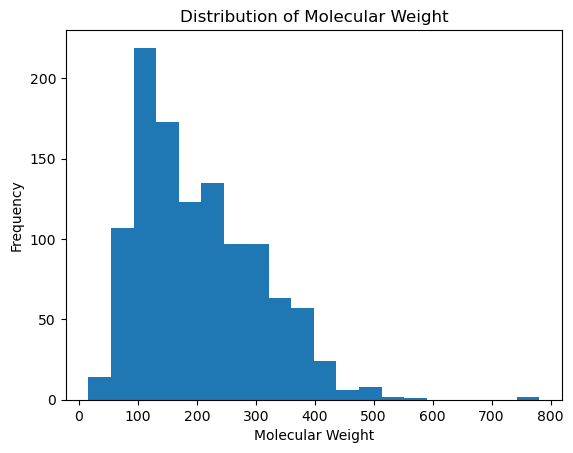

In [67]:
df["Molecular_Weight"].plot(kind="hist",bins=20,title="Distribution of Molecular Weight",xlabel="Molecular Weight")

## Feature Relationship
As part of exploring the data, I think it would be a necessary step to check the relationship between features. I chose to check the relationship between the Molecular Weight and the Polar Surface Area as its datapoints were a bit higher in comparison to other attributes. The below scatter plot shows that the compunds with Molecular Weight within a range of 0 - 400 had a Polar Surface Area within the range of 0 - 150 and has the Number of Rings between 0 - 4, anything outside this range can be classified as an outlier.

Text(0.5, 1.0, 'Molecular Weight vs Polar Surface Area')

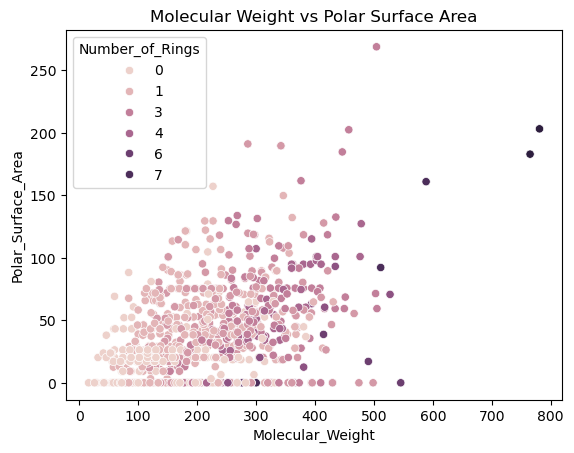

In [69]:
polar_surface_area_and_num_of_rings = sns.scatterplot(x="Molecular_Weight", y="Polar_Surface_Area",hue="Number_of_Rings",data=df)
polar_surface_area_and_num_of_rings.set_title("Molecular Weight vs Polar Surface Area")

To continue with feature relationships statistically, the relationship of each feature against all other features is described by the correlation visualization below which shows that Molecular_Weight has a strong correlation with Number_Of_Rings and Smiles. It also shows that Number_Of_H_Bonds have a strong correlation with Polar_Surface_Area. Number_of_Rings also has a strong correlation with Smiles.

In [71]:
correlation = df[["Minimum_Degree","Molecular_Weight","Number_of_H_Bond_Donors","Number_of_Rings","Number_of_Rotatable_Bonds","Polar_Surface_Area","Smiles"]].corr()
correlation

,Minimum_Degree,Molecular_Weight,Number_of_H_Bond_Donors,Number_of_Rings,Number_of_Rotatable_Bonds,Polar_Surface_Area,Smiles
Minimum_Degree,1.000000,-0.096719,-0.130664,0.246020,-0.175626,-0.189464,-0.096719
Molecular_Weight,-0.096719,1.000000,0.254877,0.652521,0.396894,0.475440,1.000000
Number_of_H_Bond_Donors,-0.130664,0.254877,1.000000,0.211087,0.077002,0.755932,0.254877
Number_of_Rings,0.246020,0.652521,0.211087,1.000000,-0.136654,0.308606,0.652521
Number_of_Rotatable_Bonds,-0.175626,0.396894,0.077002,-0.136654,1.000000,0.286723,0.396894
Polar_Surface_Area,-0.189464,0.475440,0.755932,0.308606,0.286723,1.000000,0.475440
Smiles,-0.096719,1.000000,0.254877,0.652521,0.396894,0.475440,1.000000


<Axes: >

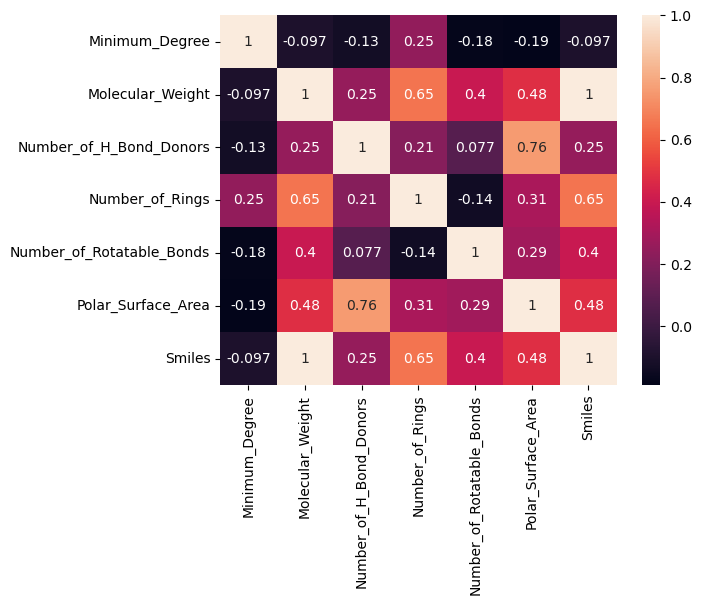

In [73]:
sns.heatmap(correlation, annot=True)

### 3. Data Preprocessing

In [81]:
#Preprocessing our data
x_scaler = MinMaxScaler()
normalized_inputs = x_scaler.fit_transform(X)
X = normalized_inputs
print(X)

[[0.5        0.57704999 0.63636364 ... 0.30434783 0.75301474 0.57704999]
 [0.5        0.24209772 0.09090909 ... 0.08695652 0.15721304 0.24209772]
 [0.5        0.17805325 0.         ... 0.17391304 0.06353283 0.17805325]
 ...
 [0.5        0.30110367 0.         ... 0.30434783 0.06870627 0.30110367]
 [0.5        0.0733528  0.         ... 0.04347826 0.         0.0733528 ]
 [0.5        0.45746928 0.         ... 0.2173913  0.16659223 0.45746928]]


In [83]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #80% training, 20% testing
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(902, 7) (902, 1)
(226, 7) (226, 1)


# Step 2 : Model Selection

1. I chose the regression alogrithm as it is one of the best algorithms that are suited for targets that are continous. Also it is one of the best to utilize in cases were there are dependent and independent variables of which in this instance, the solubility (target) is dependent on the molecular structure that were part of the attributes in our dataset including smiles.

2. Training the linear regression model with training data

In [85]:
lin_model = linear_model.LinearRegression()#Definition of our model
lin_model.fit(X_train, y_train) #Training the model with the training dataset
y_pred = lin_model.predict(X_test) #Making predictions on the testing set using our trained lin_model
# print(y_pred)

# Step 3 : Model Evaluation

1. Below is the evaluation performance of the model through the analysis of the Coefficients, Intercepts, Mean squared error, Root mean squared         error (RMSE) and the Coefficient of determination (R^2)

In [89]:
print("Coefficients                      \t:", lin_model.coef_)
print("Intercepts                        \t:",lin_model.intercept_)
print("Mean squared error                \t:",mean_squared_error(y_test,y_pred).round(3))
print("Root mean squared error (RMSE)    \t:",np.sqrt(mean_squared_error(y_test,y_pred)).round(3))
print("Coefficient of determination (R^2)\t:",r2_score(y_test,y_pred).round(3))

Coefficients                      	: [[-1.20011985 -5.16810746  1.24094493 -3.11844323 -3.24734142  7.99989535
  -5.16810746]]
Intercepts                        	: [-0.16525597]
Mean squared error                	: 1.202
Root mean squared error (RMSE)    	: 1.096
Coefficient of determination (R^2)	: 0.734


2. Visualization of the models predictions against the true values of solubility.

    Actual  Predicted
0   -1.800  -2.236990
1   -8.940  -6.811400
2   -3.672  -3.511723
3   -2.647  -3.132873
4   -1.500  -3.371243
5   -0.740  -0.959678
6   -4.120  -4.781917
7   -3.224  -2.934408
8   -0.364  -3.837764
9   -2.080  -2.394307
10  -5.170  -3.441772
11  -1.614  -1.546464
12  -1.870  -1.420663
13  -5.820  -3.785926
14  -3.590  -2.797566
15  -3.390  -3.081636
16  -2.330  -1.306716
17  -1.450  -3.289772
18  -2.090  -2.845650
19   0.651  -1.958130


<Axes: xlabel='Actual', ylabel='Predicted'>

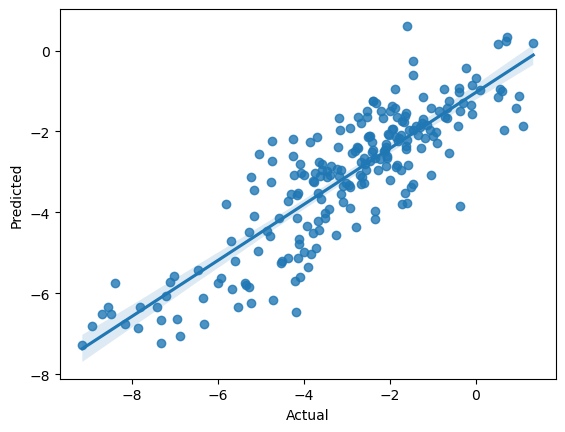

In [93]:
# print(np.array(y_pred),np.array(y_test))
y_pred_conv = np.array(y_pred).ravel()
y_test_conv = np.array(y_test).ravel()
scatter_data = pd.DataFrame({"Actual": y_test_conv, "Predicted": y_pred_conv})
print(scatter_data.head(20))
sns.regplot(x="Actual", y="Predicted", data=scatter_data)

In [ ]:
# Formula
# Documentation/Interpretation
# Read Question paper
# How to measure accuracy of a regression model

<Axes: xlabel='Actual', ylabel='Predicted'>

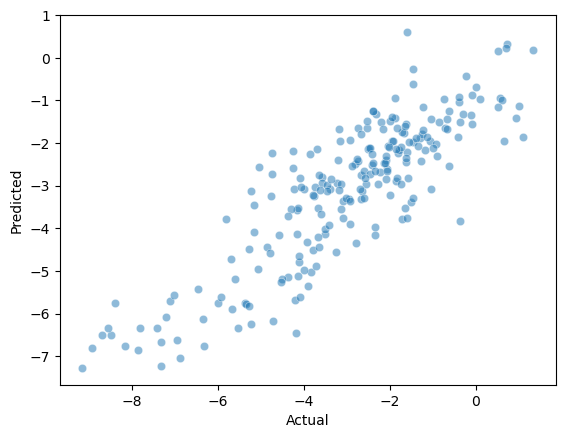

In [99]:
sns.scatterplot(x="Actual", y="Predicted", data=scatter_data,alpha=0.5)

# Step 4 : Discussion

## 1. How well does the model perform ?

### Regression Plot
Based on the scatter plot and regression plot above, we see that most of these points are clustered together towards the regression line, if we focus on the regression plot. This implies that our model's predictions are not that far from being accurate (being close to the reggression line), if I can assess this visually, I can state that our model is performing well based on the regression plot above as the predicted points are very intertwined  with the actual values of solubility and we see that by these datapoints that are clustered together.

### Scatter Plot
Based on the appearance of the points in the scatter plot above, we can easily see the points that are on top of another and this represents the values that were correctly predicted. We can deduce that the higher the actual values of solubility, the more accurate the predicted values are or close to being accurate. The smaller the actual values of solubility, the less accurate our model becomes in contrast to when they are higher.

## 2. Feature Importance
Based on the evaluation of the model, our model has coefficients for each feature that we will utilize to build our models prediction equation.
The features that were used and coefficients that the model got can be seen below.
Using the coefficient of the features, our equation is : y = -1.20011985(Minimum_Degree) - 5.16810746(Molecular_Weight) + 1.24094493(Number_of_H_Bond_Donors) -3.11844323(Number_of_Rings) -3.24734142(Number_of_Rotatable_Bonds) + 7.99989535(Polar_Surface_Area) + -5.16810746(Smiles) - 0.16525597

As per the model's equation above, the top 3 chemical features that had the most impact are : Polar_Surface_Area, Smiles and Molecular_Weight respectively. This was deduced by assessing the absolute value of each feature's coefficient, the larger the coefficient, the higher the feature importance.

In [196]:
features = df.drop(["Compound_ID","Log_Solubility"], axis=1)#Featuers
print("Features :",features.columns)
print()
print("Coefficient :",lin_model.coef_)
print()
print("Intercept :",lin_model.intercept_)

Features : Index(['Minimum_Degree', 'Molecular_Weight', 'Number_of_H_Bond_Donors',
       'Number_of_Rings', 'Number_of_Rotatable_Bonds', 'Polar_Surface_Area',
       'Smiles'],
      dtype='object')

Coefficient : [[-1.20011985 -5.16810746  1.24094493 -3.11844323 -3.24734142  7.99989535
  -5.16810746]]

Intercept : [-0.16525597]


### Challenges
i) During the declaration of features, I thought about dropping the Smiles column as I thought that it was not a relevant feature and was in a very unfamiliar format. I saw that there was a way to categorize that type of chemical data to numerical values using the RDkit library.

ii) When I was visualizing the predicted values against the scatter plot, I got an error that took me a while to figure out. The predicted and actual values were stored in their own respective arrays, and those array needed to be flatten to 1-dimension through the use of ravel before implementing a scatter plot.

### Improvements
i) Through the progression of building this model, I figured that it is important to store your features in their own variables before standardizing them, and have a separate variable to store them after the standardization. There're some instances were you will need the raw format of your features in the process of building the model, so it would be a best practice to call a simple variable that has the raw features of the model.

ii) The scatter plot and the regression plot that were visualized above did not contain any colors that differentiated the actual and predicted values ,so it is a bit difficult to distinguish between the two in the plot. So I think it would have been worth it for me to put in the effort to visualize each category(Actual and Predicted) with two different colors.